<!--NAVIGATION-->
# < [Autograd](2_Autograd.ipynb) | Optimization | [Gradient Descent](4-Visualizing_Gradient_Descent.ipynb) >

# Some Operations on Images

## Notebook Introduction

In this short notebook, we will see how to read an image and apply Prewitt filter on it

c:\Users\hp\.conda\envs\pth\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
c:\Users\hp\.conda\envs\pth\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


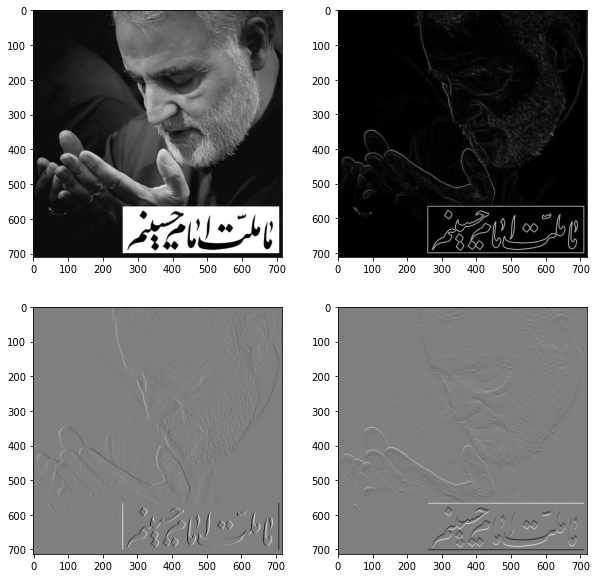

In [9]:
# %matplotlib notebook
from scipy import signal
from scipy import misc,ndimage
from skimage import color
from skimage import io
import numpy as np
import matplotlib.pyplot as plt


img = color.rgb2gray(io.imread('data/Soleymani_mellat.jpg'))
# kh = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype = np.float)
# kv = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype = np.float)
kh = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype = np.float)
kv = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype = np.float)
gx = signal.convolve2d(img, kh)
gy = signal.convolve2d(img, kv)

g = np.sqrt(gx * gx + gy * gy)
g = (g-g.min())/ (g.max()-g.min()) * 255.0 
# g *= 255.0 / g.max()

fig = plt.figure(figsize=(10,10))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(221)  # upper left side
ax2 = fig.add_subplot(222)  # upper right side
ax3 = fig.add_subplot(223)  # lower left side
ax4 = fig.add_subplot(224)  # lower right side
ax1.imshow(img)
ax2.imshow(g)
ax3.imshow(gx)
ax4.imshow(gy)
plt.show()

In [2]:
print(g.dtype, g.min(), g.max())
print(gx.dtype, gx.min(), gx.max())

float64 0.0 255.0
float64 -2.996078431372549 2.996078431372549


c:\Users\hp\.conda\envs\pth\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


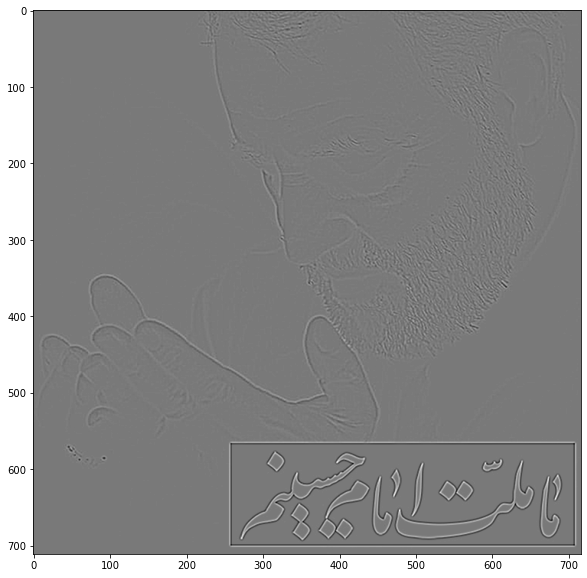

In [20]:
import cv2
import numpy as np

# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)

# Apply Laplacian operator in some higher datatype
laplacian_cv2 = cv2.Laplacian(blur,cv2.CV_64F)
g = laplacian_cv2
laplacian_cv2 = (g-g.min())/ (g.max()-g.min())# * 255.0 

f = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype = np.float)
L = signal.convolve2d(img, f)

g = L
g = (g-g.min())/ (g.max()-g.min())# * 255.0 
# g *= 255.0 / g.max()

fig = plt.figure(figsize=(10,10))
plt.gray()  # show the filtered result in grayscale
# ax1 = fig.add_subplot(221)  # upper left side
# ax2 = fig.add_subplot(222)  # upper right side
# ax3 = fig.add_subplot(223)  # lower left side
ax4 = fig.add_subplot(111)  # lower right side
# ax1.imshow(img)
# ax2.imshow(g)
# ax3.imshow(laplacian_cv2)
ax4.imshow(laplacian_cv2)
plt.show()
# print(type(g), type(laplacian_cv2))

___

## Some other operations on images using scipy

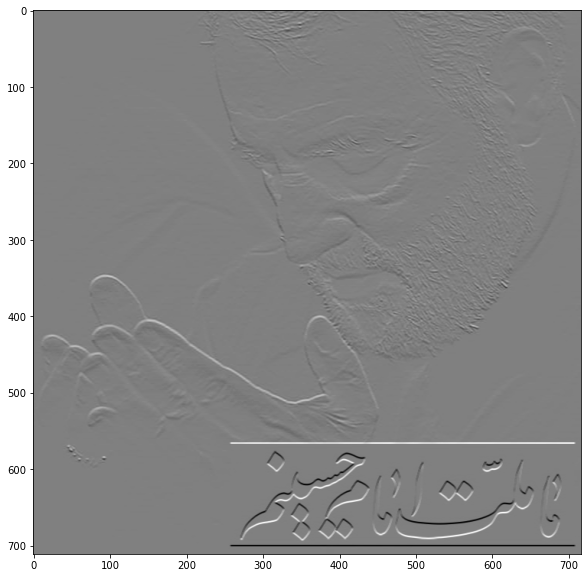

In [4]:
edge_im = ndimage.prewitt(img, axis=0)
fig = plt.figure(figsize=(10,10))
plt.imshow(edge_im)
plt.show()


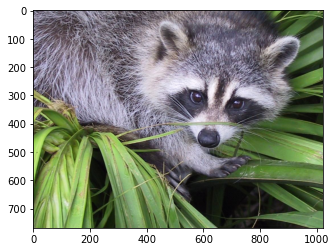

In [5]:
from scipy import misc
f = misc.face()
plt.imshow(f)
plt.show()

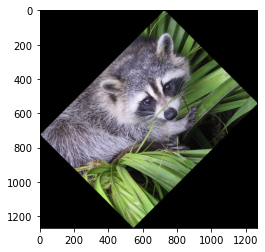

In [6]:
# rotation
from scipy import misc,ndimage
face = misc.face()
rotate_face = ndimage.rotate(face, 45)
plt.imshow(rotate_face)
plt.show()

((768, 1024), numpy.uint8, dtype('uint8'))

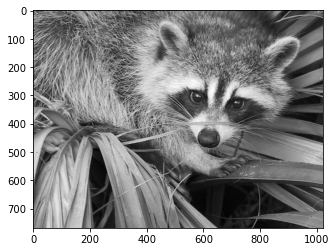

In [7]:
face = misc.face(gray = True)
plt.imshow(face, cmap='gray')
face.shape, type(face[0,0]), face.dtype